In [180]:
import pandas as pd 
import statsmodels.api as sm

In [181]:
df = pd.read_csv('load/load/total_export_ANALYSIS.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,Rice,Rubber,Durian,Other_Fruits,"Horticultural_products,_n.i.e.",Animal_products,Crustaceans,Fish,"Cuttlefish,_squid,_octopus","Fishery_products,_n.i.e.",...,Chemicals_&_Petro-chemical_Products,Petroleum_products,Photographic_&_cinematographic_instruments_&_supplies,Medicinal_and_surgical_equipment_and_supplies,Toiletries_and_cosmetics,Furniture_and_parts,Other_Manufacturing_products,Coverage_Adjustment,Timing_Adjustment,"Exports,_f.o.b._(BOP_basis)"
1995-01-01,196.61,229.04,0.54,1.97,116.57,39.46,152.20,33.27,23.25,3.70,...,138.59,15.02,23.88,20.84,8.56,61.75,258.65,-67.51,0.0,3928.00
1995-02-01,186.20,216.29,0.58,2.60,104.63,40.65,120.85,30.25,24.12,3.68,...,136.73,41.14,32.79,19.48,9.14,57.44,260.53,-46.11,0.0,3949.00
1995-03-01,175.64,238.01,3.29,4.13,132.28,51.90,176.01,37.45,30.05,4.76,...,176.21,45.09,30.83,21.91,14.36,75.61,348.30,-105.91,0.0,5083.00
1995-04-01,107.99,181.01,11.73,6.40,103.94,42.44,146.65,30.94,21.91,4.74,...,169.39,23.09,27.90,17.15,10.83,54.71,249.90,-60.80,0.0,4005.00
1995-05-01,191.15,216.77,15.06,12.38,107.54,44.26,177.62,35.12,24.95,3.76,...,249.00,19.71,27.48,22.08,11.66,69.34,323.11,-91.42,0.0,4789.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,637.49,361.63,48.69,191.81,159.33,153.77,67.61,37.64,17.27,8.93,...,1731.72,958.77,257.71,166.14,306.43,142.73,877.52,-379.79,0.0,23099.92
2023-12-01,532.27,306.66,77.54,210.95,129.23,137.43,62.49,33.40,17.74,7.99,...,1562.99,1014.69,210.06,164.92,302.98,135.50,824.87,-411.25,0.0,22380.30
2024-01-01,602.49,326.87,48.63,240.71,163.27,154.76,57.60,40.46,24.13,7.44,...,1615.16,765.07,225.98,182.95,308.17,118.50,790.58,-637.67,0.0,22012.20
2024-02-01,523.91,419.10,50.46,127.29,169.21,156.94,58.28,33.84,23.13,6.80,...,1603.84,633.93,194.39,173.53,319.35,126.65,850.15,-348.41,0.0,23036.45


In [182]:
ts_raw = df.iloc[:,0]
ts_raw

1995-01-01    196.61
1995-02-01    186.20
1995-03-01    175.64
1995-04-01    107.99
1995-05-01    191.15
               ...  
2023-11-01    637.49
2023-12-01    532.27
2024-01-01    602.49
2024-02-01    523.91
2024-03-01    484.76
Name: Rice, Length: 351, dtype: float64

In [183]:
ts = df.iloc[:,0].pct_change().dropna()
ts

1995-02-01   -0.052947
1995-03-01   -0.056713
1995-04-01   -0.385163
1995-05-01    0.770071
1995-06-01   -0.315093
                ...   
2023-11-01    0.216445
2023-12-01   -0.165054
2024-01-01    0.131926
2024-02-01   -0.130425
2024-03-01   -0.074727
Name: Rice, Length: 350, dtype: float64

In [184]:
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis

# Perform X-13ARIMA-SEATS analysis
result = x13_arima_analysis(ts, 
                            x12path='C:\\x13as\\',
                            freq='M')

# Print the seasonally adjusted series
new_ts = result.seasadj
display(new_ts)


c:\Users\Admin\.virtualenvs\BoT_Exports_X13-gKChaYI8\Lib\site-packages\statsmodels\tsa\x13.py:192: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


1995-02-01    0.121771
1995-03-01   -0.096806
1995-04-01   -0.376238
1995-05-01    0.829612
1995-06-01   -0.319813
                ...   
2023-11-01    0.139852
2023-12-01   -0.143661
2024-01-01    0.163459
2024-02-01   -0.001158
2024-03-01   -0.082620
Name: seasadj, Length: 350, dtype: float64

In [23]:
#DEsesonality using X13 by US Census Bureau
from tqdm import tqdm
import pickle
import json
import pandas as pd
import numpy as np
from statsmodels.tsa.x13 import x13_arima_analysis
from statsmodels.tsa.x13 import X13Warning
import warnings

# Suppress specific X13 warnings
warnings.filterwarnings("ignore", category=X13Warning)

df = pd.read_csv('load/load/total_export_ANALYSIS.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

x13_path='C:\\x13as\\'
freq='M'

dict_deseasonalized_value = {}
dict_deseasonalized_pct_change = {}

for col in tqdm(df.columns,
                desc='Deseasonalizing timeseries...'):
   try:
      #deseasonalize the value 
      ts = df[col].replace(0, 1e-10).ffill().bfill().dropna()

      result = x13_arima_analysis(ts, 
                              x12path=x13_path, 
                              freq=freq)

      # Convert components to DataFrame
      df1 = pd.DataFrame({
                     'observed': result.observed,
                     'seasadj': result.seasadj,
                     'trend': result.trend,
                     'irregular': result.irregular,
                     'seasonal_factor': result.observed / result.seasadj
                  })
      dict_deseasonalized_value[col] = df1

   except:
      pass
    
   try:
      #deseasonalize the pct_change of the value
      ts = ts.pct_change().replace(0, 1e-10).dropna()

      result = x13_arima_analysis(ts, 
                                 x12path=x13_path, 
                                 freq=freq)

      # Convert components to DataFrame
      df2 = pd.DataFrame({
                           'observed': result.observed,
                           'seasadj': result.seasadj,
                           'trend': result.trend,
                           'irregular': result.irregular,
                           'seasonal_factor': result.observed / result.seasadj
                        })

      dict_deseasonalized_pct_change[col] = df2
   except:
      pass
    
# #convert dictionary to pickle and json
# with open('dict_deseasonalized_value.pickle', 'wb') as handle:
#     pickle.dump(dict_deseasonalized_value, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('dict_deseasonalized_pct_change.pickle', 'wb') as handle:
#     pickle.dump(dict_deseasonalized_pct_change, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('dict_deseasonalized_value.json', 'w') as handle:
#     json.dump(dict_deseasonalized_value, handle)

# with open('dict_deseasonalized_pct_change.json', 'w') as handle:
#     json.dump(dict_deseasonalized_pct_change, handle)

Deseasonalizing timeseries...: 100%|██████████| 67/67 [10:17<00:00,  9.21s/it]


In [26]:
#convert dictionary to pickle 
with open('dict_deseasonalized_value.pickle', 'wb') as handle:
    pickle.dump(dict_deseasonalized_value, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('dict_deseasonalized_pct_change.pickle', 'wb') as handle:
    pickle.dump(dict_deseasonalized_pct_change, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [29]:
#open pickle file
with open('dict_deseasonalized_value.pickle', 'rb') as handle:
    tdict_deseasonalized_value = pickle.load(handle)
    
with open('dict_deseasonalized_pct_change.pickle', 'rb') as handle:
    tdict_deseasonalized_pct_change = pickle.load(handle)

In [32]:
for k,v in tdict_deseasonalized_value.items():
    display(k)
    display(v)
    break
display(len(tdict_deseasonalized_value))

'Rice'

,observed,seasadj,trend,irregular,seasonal_factor
1995-01-01,196.61,178.265141,186.478635,0.955955,1.102908
1995-02-01,186.20,205.441992,180.540166,1.137930,0.906339
1995-03-01,175.64,181.019323,173.110849,1.045684,0.970283
1995-04-01,107.99,117.286865,164.738659,0.711957,0.920734
1995-05-01,191.15,200.064212,156.435754,1.278891,0.955443
...,...,...,...,...,...
2023-11-01,637.49,527.750224,494.900962,1.066375,1.207939
2023-12-01,532.27,453.193097,505.805571,0.895983,1.174488
2024-01-01,602.49,539.961243,513.968437,1.050573,1.115802
2024-02-01,523.91,536.841248,523.435752,1.025611,0.975912


65

In [31]:
for k,v in tdict_deseasonalized_pct_change.items():
    display(k)
    display(v)
    break
display(len(tdict_deseasonalized_pct_change))

'Rice'

,observed,seasadj,trend,irregular,seasonal_factor
1995-02-01,-0.052947,0.121771,0.004817,0.116954,-0.434813
1995-03-01,-0.056713,-0.096806,0.013239,-0.110045,0.585843
1995-04-01,-0.385163,-0.376238,0.016979,-0.393217,1.023721
1995-05-01,0.770071,0.829612,0.019019,0.810593,0.928231
1995-06-01,-0.315093,-0.319813,0.023006,-0.342819,0.985242
...,...,...,...,...,...
2023-11-01,0.216445,0.139852,0.050793,0.089059,1.547671
2023-12-01,-0.165054,-0.143661,0.047983,-0.191644,1.148909
2024-01-01,0.131926,0.163459,0.043588,0.119871,0.807088
2024-02-01,-0.130425,-0.001158,0.039366,-0.040524,112.638103


63

In [67]:
import pandas as pd
from pmdarima import auto_arima
import warnings

# Function to generate DataFrame of periods for walk-forward analysis
def generate_periods_df(series, window_size, steps):
    periods = []
    for t in range(steps):
        train_end_index = window_size + t
        periods.append({
            'window_start': series.index[0],
            'window_end': series.index[train_end_index - 1],
            'test': series.index[train_end_index]
        })
    return pd.DataFrame(periods)

# Function to perform walk-forward forecasting using the periods DataFrame
def walk_forward_forecasting(series, periods_df):
    predictions = []
    date_lst = []
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", FutureWarning)  # Ignore FutureWarnings
        for _, row in tqdm(periods_df.iterrows(),
                           total=len(periods_df),
                           desc="Walk-Forward Forecasting",
                           dynamic_ncols=True):
            train_data = series[series.index <= row["window_end"]]  # Include data up to the end of the window
            model = auto_arima(train_data, seasonal=True, m=12, trace=False,
                            error_action='ignore', suppress_warnings=True)
            # Forecast the next period
            forecast = model.predict(n_periods=1)
            predictions.append(forecast[0])
            date_lst.append(row["test"])

    
    forecast_series = pd.Series(predictions, index=date_lst)
    return forecast_series

#Walk Forward parameters
window_size = 180  # 15 years of monthly data
total_observations = len(new_ts)  # Total data points
steps = total_observations - window_size  # Remaining points after initial training window

# Generate periods DataFrame
periods_df = generate_periods_df(new_ts, window_size, steps)
# Display the DataFrame with walk-forward periods
display(periods_df)

# Perform walk-forward forecasting
rolling_forecasts = walk_forward_forecasting(new_ts, periods_df)
# Display the first few predictions
display(rolling_forecasts)


,window_start,window_end,test
0,1995-02-01,2010-01-01,2010-02-01
1,1995-02-01,2010-02-01,2010-03-01
2,1995-02-01,2010-03-01,2010-04-01
3,1995-02-01,2010-04-01,2010-05-01
4,1995-02-01,2010-05-01,2010-06-01
...,...,...,...
165,1995-02-01,2023-10-01,2023-11-01
166,1995-02-01,2023-11-01,2023-12-01
167,1995-02-01,2023-12-01,2024-01-01
168,1995-02-01,2024-01-01,2024-02-01


2010-02-01   -0.060959
2010-03-01    0.042993
2010-04-01    0.039113
2010-05-01    0.142600
2010-06-01    0.111666
                ...   
2023-11-01    0.027084
2023-12-01   -0.052447
2024-01-01    0.127429
2024-02-01   -0.037749
2024-03-01    0.000712
Length: 170, dtype: float64

In [71]:
df_forcast = pd.DataFrame(rolling_forecasts, columns=['forecast'])
df_forcast.to_csv("df_forecast_rice.csv")
display(df_forcast)

,forecast
2010-02-01,-0.060959
2010-03-01,0.042993
2010-04-01,0.039113
2010-05-01,0.142600
2010-06-01,0.111666
...,...
2023-11-01,0.027084
2023-12-01,-0.052447
2024-01-01,0.127429
2024-02-01,-0.037749


In [79]:
actual = new_ts[new_ts.index.isin(df_forcast.index)]
actual.name = 'actual'

df_acurracy = pd.concat([actual, df_forcast], axis=1)
display(df_acurracy)

,actual,forecast
2010-02-01,-0.098602,-0.060959
2010-03-01,0.016412,0.042993
2010-04-01,-0.148115,0.039113
2010-05-01,-0.151206,0.142600
2010-06-01,0.108680,0.111666
...,...,...
2023-11-01,0.139852,0.027084
2023-12-01,-0.143661,-0.052447
2024-01-01,0.163459,0.127429
2024-02-01,-0.001158,-0.037749


In [80]:
df_acurracy['error'] = df_acurracy['actual'] - df_acurracy['forecast']
df_acurracy['abs_error'] = abs(df_acurracy['error'])
df_acurracy['squared_error'] = df_acurracy['error']**2
df_acurracy['abs_percentage_error'] = abs(df_acurracy['error'] / df_acurracy['actual'])
df_acurracy
df_acurracy.to_csv("df_acurracy_rice.csv")

In [81]:
df_acurracy

,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-02-01,-0.098602,-0.060959,-0.037643,0.037643,0.001417,0.381770
2010-03-01,0.016412,0.042993,-0.026580,0.026580,0.000707,1.619558
2010-04-01,-0.148115,0.039113,-0.187228,0.187228,0.035054,1.264069
2010-05-01,-0.151206,0.142600,-0.293807,0.293807,0.086322,1.943083
2010-06-01,0.108680,0.111666,-0.002986,0.002986,0.000009,0.027474
...,...,...,...,...,...,...
2023-11-01,0.139852,0.027084,0.112768,0.112768,0.012717,0.806340
2023-12-01,-0.143661,-0.052447,-0.091214,0.091214,0.008320,0.634923
2024-01-01,0.163459,0.127429,0.036029,0.036029,0.001298,0.220419
2024-02-01,-0.001158,-0.037749,0.036591,0.036591,0.001339,31.601045


In [87]:
df_acurracy.index

DatetimeIndex(['2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
               '2010-10-01', '2010-11-01',
               ...
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', length=170, freq=None)

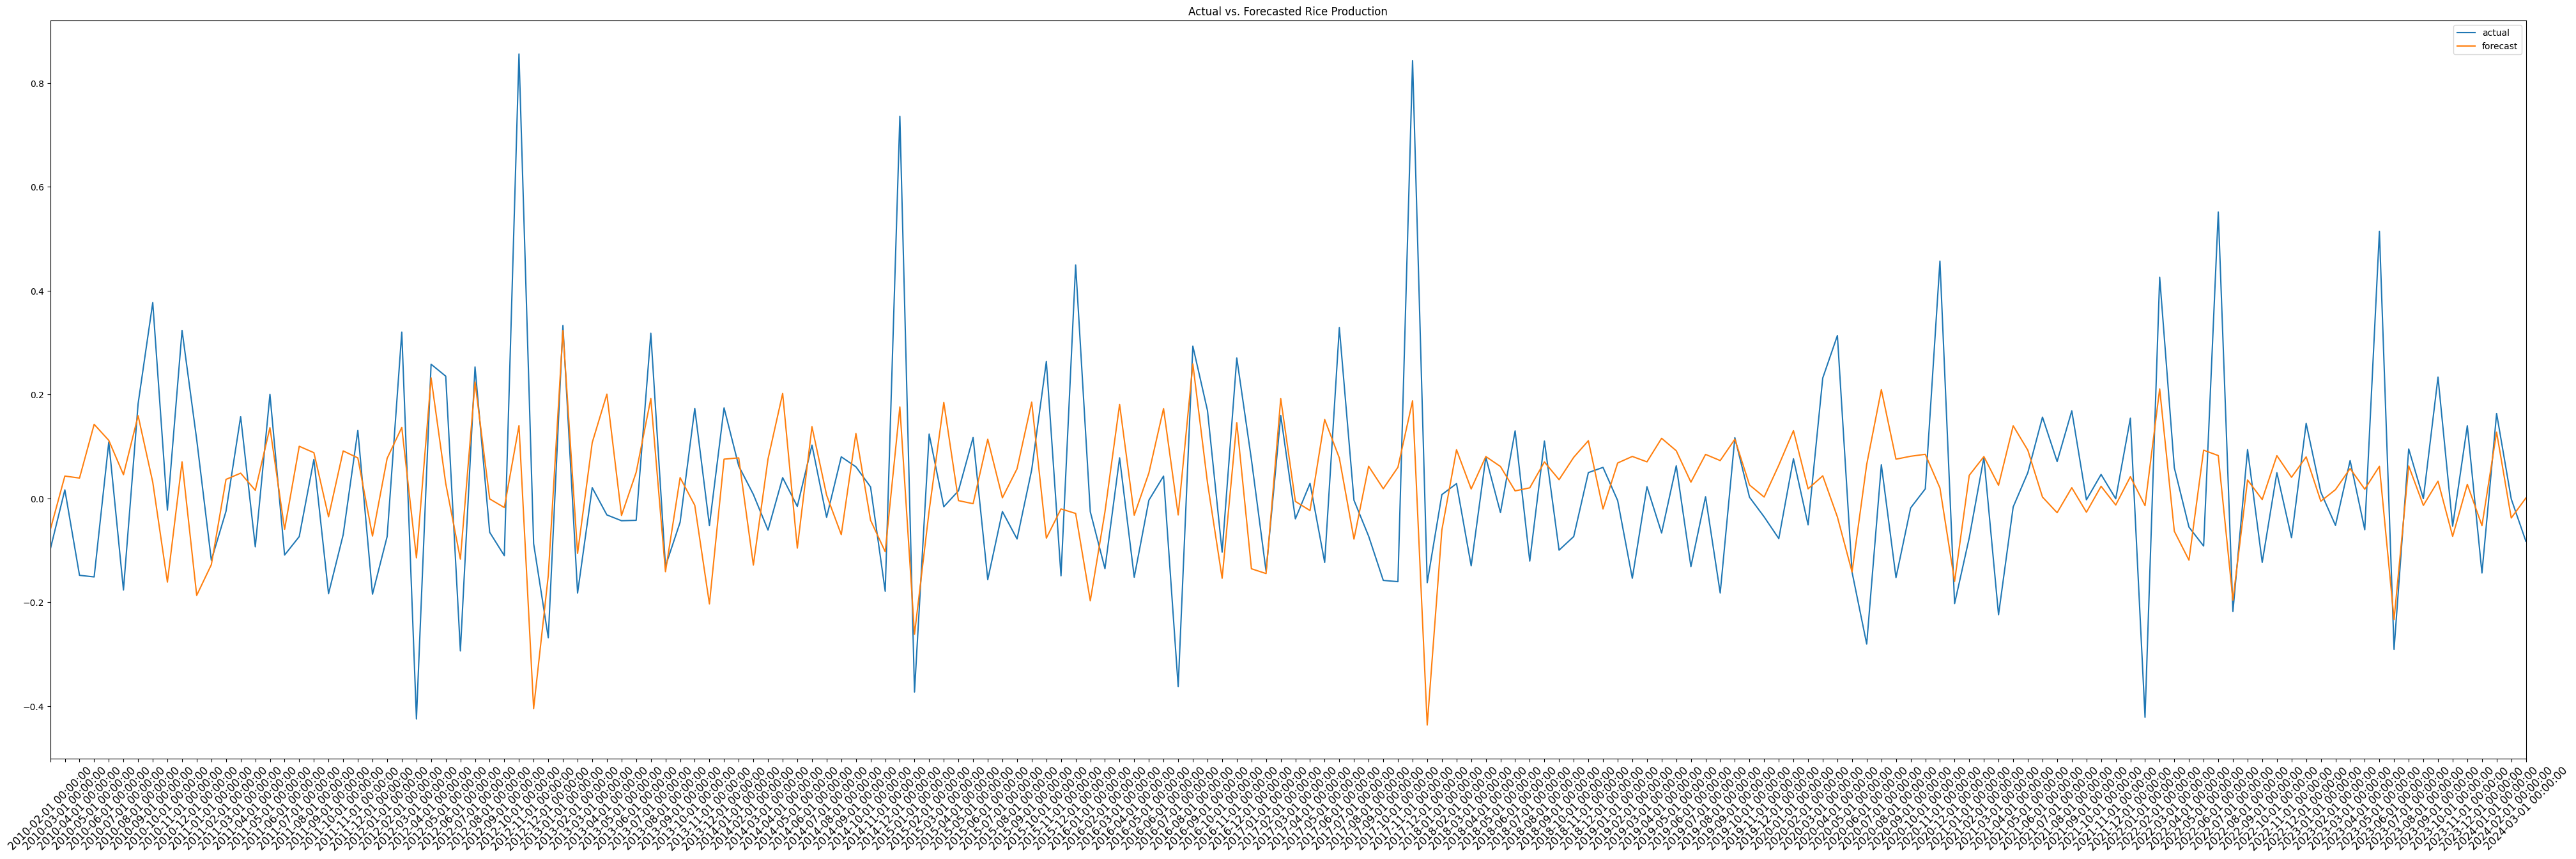

In [95]:
import matplotlib.pyplot as plt

# Plot the DataFrame
ax = df_acurracy[["actual", "forecast"]].plot(figsize=(50, 15), title="Actual vs. Forecasted Rice Production")

# Set x-axis ticks to ensure all x-values are listed
ax.set_xticks(df_acurracy.index)
ax.set_xticklabels(df_acurracy.index)
# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, fontsize=12)

plt.show()


# deseasonalised 

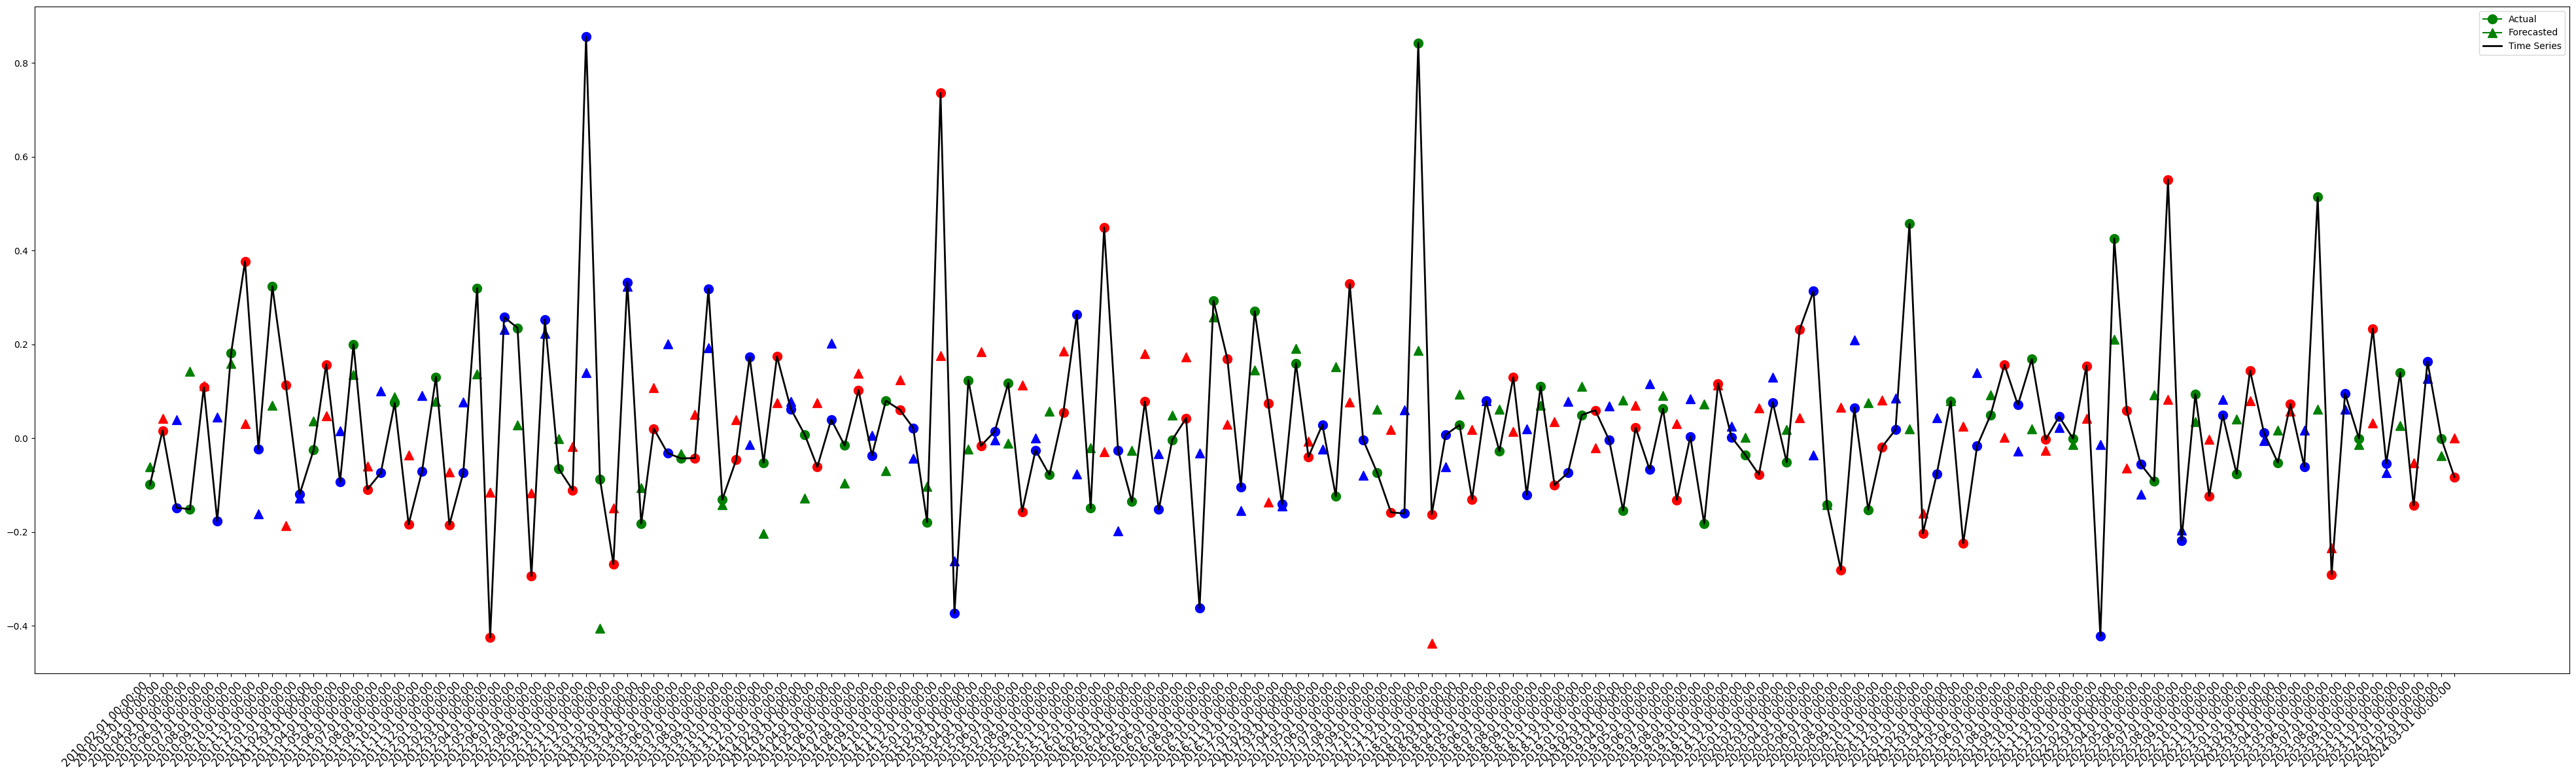

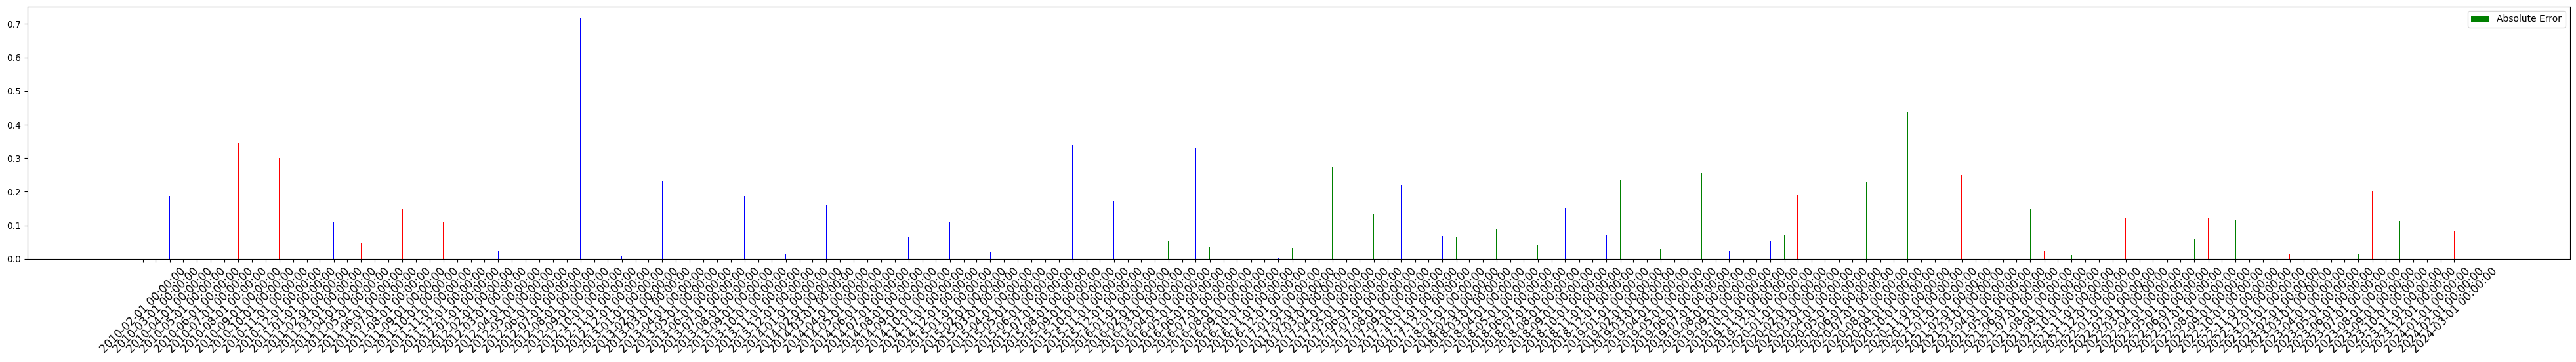

In [99]:
import matplotlib.pyplot as plt

# Define a list of colors to alternate between
colors = ['green', 'red', 'blue']

# Plot the DataFrame
fig, ax = plt.subplots(figsize=(50, 15))

# Plot actual and forecasted values with alternating colors
for i, (actual, forecast) in enumerate(zip(df_acurracy["actual"], df_acurracy["forecast"])):
    color = colors[i % len(colors)]  # Alternating between green, red, and blue
    ax.plot(df_acurracy.index[i], actual, marker='o', markersize=10, color=color, label='Actual' if i == 0 else None)
    ax.plot(df_acurracy.index[i], forecast, marker='^', markersize=10, color=color, label='Forecasted' if i == 0 else None)

# Plot the time series line with the same color scheme
df_acurracy["actual"].plot(ax=ax, color='black', linewidth=2, label='Time Series')

# Set x-axis ticks to ensure all x-values are listed
ax.set_xticks(df_acurracy.index)
ax.set_xticklabels(df_acurracy.index)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, fontsize=12)

#title
plt.title(f"Actual vs. Forecasted")
# Add legend
plt.legend()

# Create a subplot for absolute error
fig, ax_err = plt.subplots(figsize=(50, 5))

# Plot absolute error with corresponding colors
for i, error in enumerate(df_acurracy["abs_error"]):
    color = colors[i % len(colors)]  # Match the color of actual or forecasted value
    ax_err.bar(df_acurracy.index[i], error, color=color, label='Absolute Error' if i == 0 else None)

# Set x-axis ticks to ensure all x-values are listed
ax_err.set_xticks(df_acurracy.index)
ax_err.set_xticklabels(df_acurracy.index)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, fontsize=12)

# Add legend
plt.legend()

plt.show()


In [ ]:
import pandas as pd

def calculate_accuracy_metrics(actual, forecast):
    """
    Calculate accuracy metrics for the actual and forecasted values.

    Parameters:
    actual (pd.Series): Series of actual values.
    forecast (pd.Series): Series of forecasted values.

    Returns:
    pd.DataFrame: DataFrame containing actual, forecast, and calculated metrics.
    """
    df_accuracy = pd.concat([actual, forecast], axis=1)
    df_accuracy.columns = ['actual', 'forecast']
    df_accuracy['error'] = df_accuracy['actual'] - df_accuracy['forecast']
    df_accuracy['abs_error'] = abs(df_accuracy['error'])
    df_accuracy['squared_error'] = df_accuracy['error']**2
    df_accuracy['abs_percentage_error'] = abs(df_accuracy['error'] / df_accuracy['actual'])
    
    return df_accuracy


In [27]:
calculate_accuracy_metrics(actual, df_forcast)

NameError: name 'calculate_accuracy_metrics' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_forecast(df_accuracy, col_name, type="% Change"):
    """
    Plot the actual vs forecasted values and absolute errors.

    Parameters:
    df_accuracy (pd.DataFrame): DataFrame containing actual, forecast, and calculated metrics.
    """
    colors = ['green', 'red', 'blue']
    fig, ax = plt.subplots(figsize=(50, 15))

    # Plot actual and forecasted values with alternating colors
    for i, (idx, row) in enumerate(df_accuracy.iterrows()):
        color = colors[i % len(colors)]  # Alternating between green, red, and blue
        ax.plot(idx, row['actual'], marker='o', markersize=10, color=color, label='Actual' if i == 0 else None)
        ax.plot(idx, row['forecast'], marker='^', markersize=10, color=color, label='Forecasted' if i == 0 else None)

    # Plot the time series line with the same color scheme
    df_accuracy["actual"].plot(ax=ax, color='black', linewidth=2, label='Time Series')

    # Set x-axis ticks to ensure all x-values are listed
    ax.set_xticks(df_accuracy.index)
    ax.set_xticklabels(df_accuracy.index)

    # Rotate x-axis labels for better readability and increase font size
    plt.xticks(rotation=45, fontsize=12)

    #title
    plt.title(f"Actual vs. Forecasted {col_name} ({type})")
    # Add legend
    plt.legend()

    # Create a subplot for absolute error
    fig, ax_err = plt.subplots(figsize=(50, 5))

    # Plot absolute error with corresponding colors
    for i, (idx, row) in enumerate(df_accuracy.iterrows()):
        color = colors[i % len(colors)]  # Match the color of actual or forecasted value
        ax_err.bar(idx, row['abs_error'], color=color, label='Absolute Error' if i == 0 else None)

    # Set x-axis ticks to ensure all x-values are listed
    ax_err.set_xticks(df_accuracy.index)
    ax_err.set_xticklabels(df_accuracy.index)

    # Rotate x-axis labels for better readability and increase font size
    plt.xticks(rotation=45, fontsize=12)

    # Add legend
    plt.legend()

    plt.show()


#actual scale

In [142]:
df_acurracy

,actual,forecast,error,abs_error,squared_error,abs_percentage_error
2010-02-01,-0.098602,-0.060959,-0.037643,0.037643,0.001417,0.381770
2010-03-01,0.016412,0.042993,-0.026580,0.026580,0.000707,1.619558
2010-04-01,-0.148115,0.039113,-0.187228,0.187228,0.035054,1.264069
2010-05-01,-0.151206,0.142600,-0.293807,0.293807,0.086322,1.943083
2010-06-01,0.108680,0.111666,-0.002986,0.002986,0.000009,0.027474
...,...,...,...,...,...,...
2023-11-01,0.139852,0.027084,0.112768,0.112768,0.012717,0.806340
2023-12-01,-0.143661,-0.052447,-0.091214,0.091214,0.008320,0.634923
2024-01-01,0.163459,0.127429,0.036029,0.036029,0.001298,0.220419
2024-02-01,-0.001158,-0.037749,0.036591,0.036591,0.001339,31.601045


In [144]:
ts

1995-02-01   -0.052947
1995-03-01   -0.056713
1995-04-01   -0.385163
1995-05-01    0.770071
1995-06-01   -0.315093
                ...   
2023-11-01    0.216445
2023-12-01   -0.165054
2024-01-01    0.131926
2024-02-01   -0.130425
2024-03-01   -0.074727
Name: Rice, Length: 350, dtype: float64

In [165]:
df_acurracy['observed_actual'] = ts_raw[ts_raw.index.isin(df_acurracy.index)]

In [146]:
df_acurracy

,actual,forecast,error,abs_error,squared_error,abs_percentage_error,observed_actual
2010-02-01,-0.098602,-0.060959,-0.037643,0.037643,0.001417,0.381770,-0.129876
2010-03-01,0.016412,0.042993,-0.026580,0.026580,0.000707,1.619558,0.221924
2010-04-01,-0.148115,0.039113,-0.187228,0.187228,0.035054,1.264069,-0.281851
2010-05-01,-0.151206,0.142600,-0.293807,0.293807,0.086322,1.943083,0.045960
2010-06-01,0.108680,0.111666,-0.002986,0.002986,0.000009,0.027474,0.134718
...,...,...,...,...,...,...,...
2023-11-01,0.139852,0.027084,0.112768,0.112768,0.012717,0.806340,0.216445
2023-12-01,-0.143661,-0.052447,-0.091214,0.091214,0.008320,0.634923,-0.165054
2024-01-01,0.163459,0.127429,0.036029,0.036029,0.001298,0.220419,0.131926
2024-02-01,-0.001158,-0.037749,0.036591,0.036591,0.001339,31.601045,-0.130425


In [147]:
df_acurracy['forecast']

2010-02-01   -0.060959
2010-03-01    0.042993
2010-04-01    0.039113
2010-05-01    0.142600
2010-06-01    0.111666
                ...   
2023-11-01    0.027084
2023-12-01   -0.052447
2024-01-01    0.127429
2024-02-01   -0.037749
2024-03-01    0.000712
Name: forecast, Length: 170, dtype: float64

In [163]:
(1 + df_acurracy['forecast'])

2010-02-01    0.939041
2010-03-01    1.042993
2010-04-01    1.039113
2010-05-01    1.142600
2010-06-01    1.111666
                ...   
2023-11-01    1.027084
2023-12-01    0.947553
2024-01-01    1.127429
2024-02-01    0.962251
2024-03-01    1.000712
Name: forecast, Length: 170, dtype: float64

In [166]:
df_acurracy['observed_forecast'] = ts_raw.shift(1)[ts_raw.index.isin(df_acurracy.index)] * (1 +df_acurracy['forecast'])

In [164]:
ts_raw[ts_raw.index.isin(df_acurracy.index)]

2010-02-01    391.26
2010-03-01    478.09
2010-04-01    343.34
2010-05-01    359.12
2010-06-01    407.50
               ...  
2023-11-01    637.49
2023-12-01    532.27
2024-01-01    602.49
2024-02-01    523.91
2024-03-01    484.76
Name: Rice, Length: 170, dtype: float64

In [167]:
df_acurracy

,actual,forecast,error,abs_error,squared_error,abs_percentage_error,observed_actual,observed_forecast
2010-02-01,-0.098602,-0.060959,-0.037643,0.037643,0.001417,0.381770,391.26,422.249388
2010-03-01,0.016412,0.042993,-0.026580,0.026580,0.000707,1.619558,478.09,408.081281
2010-04-01,-0.148115,0.039113,-0.187228,0.187228,0.035054,1.264069,343.34,496.789373
2010-05-01,-0.151206,0.142600,-0.293807,0.293807,0.086322,1.943083,359.12,392.300385
2010-06-01,0.108680,0.111666,-0.002986,0.002986,0.000009,0.027474,407.50,399.221547
...,...,...,...,...,...,...,...,...
2023-11-01,0.139852,0.027084,0.112768,0.112768,0.012717,0.806340,637.49,538.253523
2023-12-01,-0.143661,-0.052447,-0.091214,0.091214,0.008320,0.634923,532.27,604.055313
2024-01-01,0.163459,0.127429,0.036029,0.036029,0.001298,0.220419,602.49,600.096726
2024-02-01,-0.001158,-0.037749,0.036591,0.036591,0.001339,31.601045,523.91,579.746452


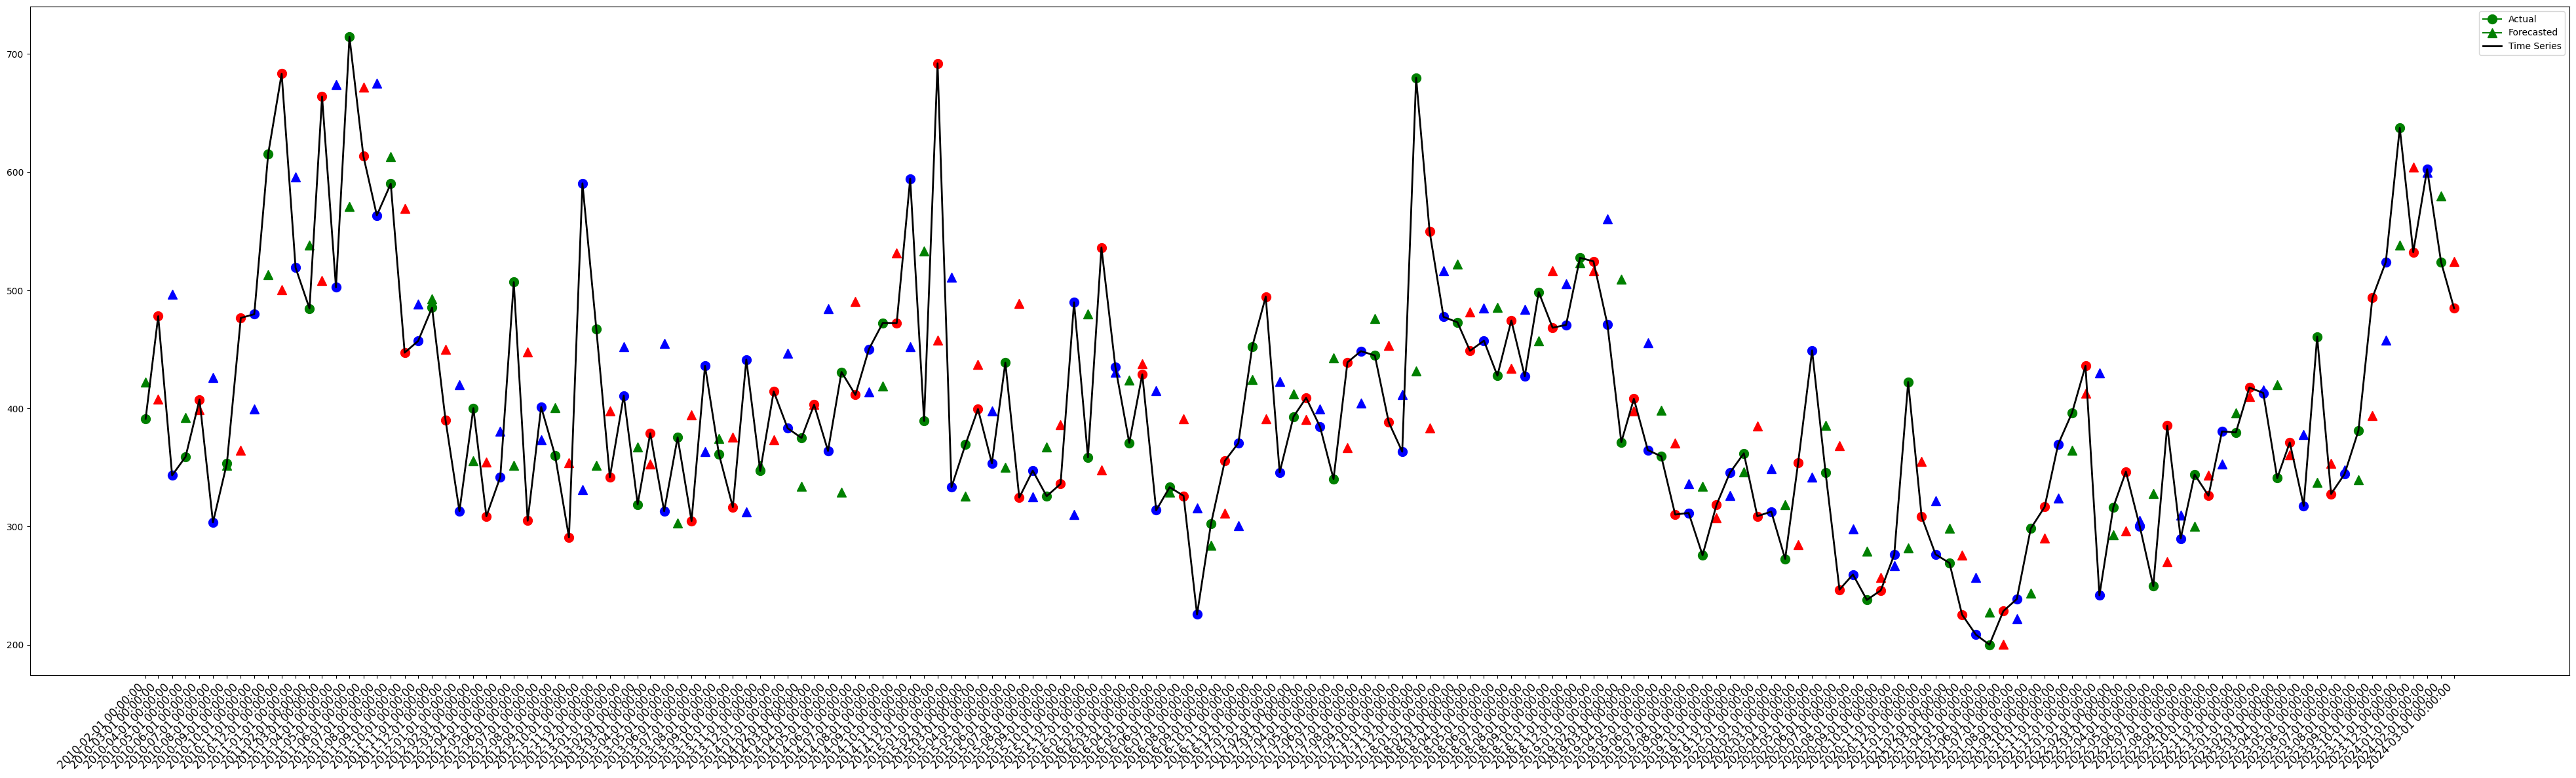

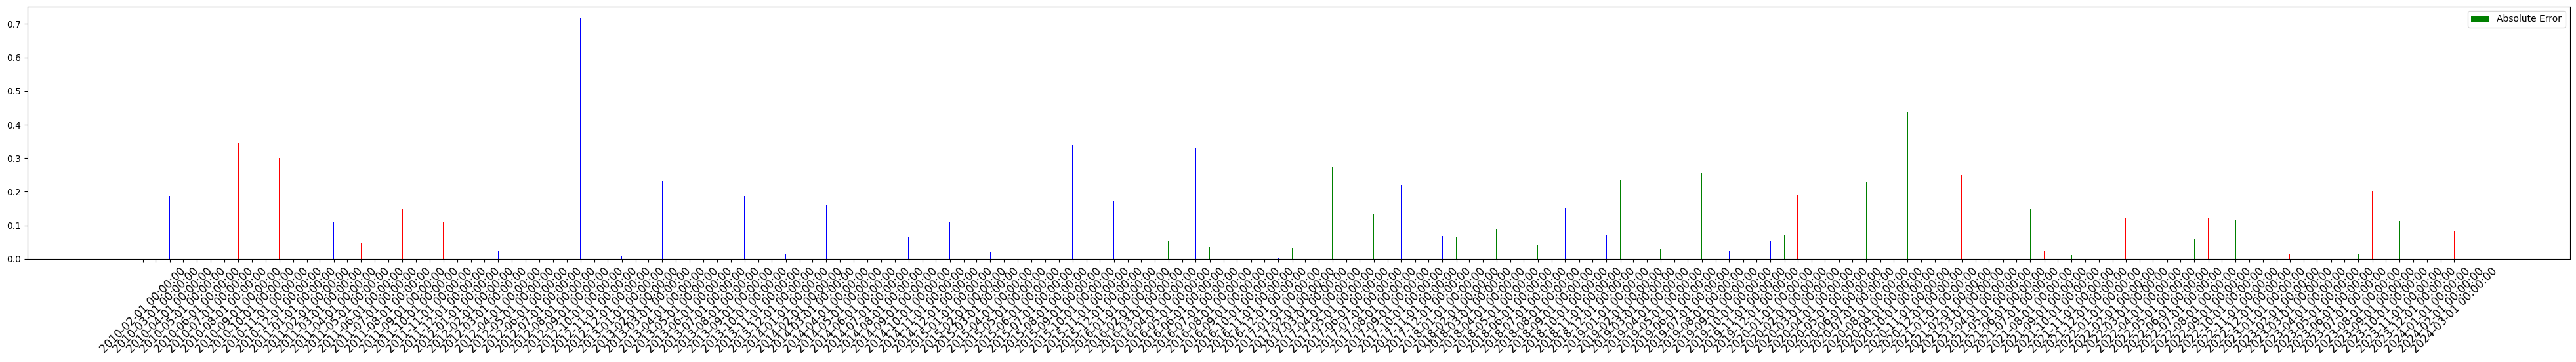

In [168]:
#actual scale
import matplotlib.pyplot as plt

# Define a list of colors to alternate between
colors = ['green', 'red', 'blue']

# Plot the DataFrame
fig, ax = plt.subplots(figsize=(50, 15))

# Plot actual and forecasted values with alternating colors
for i, (actual, forecast) in enumerate(zip(df_acurracy["observed_actual"], df_acurracy["observed_forecast"])):
    color = colors[i % len(colors)]  # Alternating between green, red, and blue
    ax.plot(df_acurracy.index[i], actual, marker='o', markersize=10, color=color, label='Actual' if i == 0 else None)
    ax.plot(df_acurracy.index[i], forecast, marker='^', markersize=10, color=color, label='Forecasted' if i == 0 else None)

# Plot the time series line with the same color scheme
df_acurracy["observed_actual"].plot(ax=ax, color='black', linewidth=2, label='Time Series')

# Set x-axis ticks to ensure all x-values are listed
ax.set_xticks(df_acurracy.index)
ax.set_xticklabels(df_acurracy.index)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, fontsize=12)

# Add legend
plt.legend()

# Create a subplot for absolute error
fig, ax_err = plt.subplots(figsize=(50, 5))

# Plot absolute error with corresponding colors
for i, error in enumerate(df_acurracy["abs_error"]):
    color = colors[i % len(colors)]  # Match the color of actual or forecasted value
    ax_err.bar(df_acurracy.index[i], error, color=color, label='Absolute Error' if i == 0 else None)

# Set x-axis ticks to ensure all x-values are listed
ax_err.set_xticks(df_acurracy.index)
ax_err.set_xticklabels(df_acurracy.index)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, fontsize=12)

# Add legend
plt.legend()

plt.show()


In [124]:
 # Perform the analysis
x13_path='C:\\x13as\\'
freq='M'
result = x13_arima_analysis(ts, x12path=x13_path, freq=freq)

# Convert components to DataFrame
df = pd.DataFrame({
    'observed': result.observed,
    'seasadj': result.seasadj,
        'trend': result.trend,
        'irregular': result.irregular
    })
df

c:\Users\Admin\.virtualenvs\BoT_Exports_X13-gKChaYI8\Lib\site-packages\statsmodels\tsa\x13.py:192: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


,observed,seasadj,trend,irregular
1995-02-01,-0.052947,0.121771,0.004817,0.116954
1995-03-01,-0.056713,-0.096806,0.013239,-0.110045
1995-04-01,-0.385163,-0.376238,0.016979,-0.393217
1995-05-01,0.770071,0.829612,0.019019,0.810593
1995-06-01,-0.315093,-0.319813,0.023006,-0.342819
...,...,...,...,...
2023-11-01,0.216445,0.139852,0.050793,0.089059
2023-12-01,-0.165054,-0.143661,0.047983,-0.191644
2024-01-01,0.131926,0.163459,0.043588,0.119871
2024-02-01,-0.130425,-0.001158,0.039366,-0.040524


In [131]:
df.seasadj 

1995-02-01    0.121771
1995-03-01   -0.096806
1995-04-01   -0.376238
1995-05-01    0.829612
1995-06-01   -0.319813
                ...   
2023-11-01    0.139852
2023-12-01   -0.143661
2024-01-01    0.163459
2024-02-01   -0.001158
2024-03-01   -0.082620
Name: seasadj, Length: 350, dtype: float64

In [132]:
df.trend

1995-02-01    0.004817
1995-03-01    0.013239
1995-04-01    0.016979
1995-05-01    0.019019
1995-06-01    0.023006
                ...   
2023-11-01    0.050793
2023-12-01    0.047983
2024-01-01    0.043588
2024-02-01    0.039366
2024-03-01    0.035447
Name: trend, Length: 350, dtype: float64

In [138]:
0.004817 +	0.116954 - 0.121771

0.0

In [140]:
-0.121771+	0.004817+	0.116954

-0.004817699999999994

In [130]:
 df.trend

1995-02-01   -0.126588
1995-03-01    0.083567
1995-04-01    0.359259
1995-05-01   -0.848631
1995-06-01    0.296807
                ...   
2023-11-01   -0.190645
2023-12-01    0.095678
2024-01-01   -0.207046
2024-02-01   -0.038208
2024-03-01    0.047173
Length: 350, dtype: float64

In [141]:
result_attributes =['irregular',
                    'observed',
                    'results',
                    'seasadj',
                    'stdout',
                    'trend']

for attr in result_attributes:
    display(result.__getattribute__(attr))

1995-02-01    0.116954
1995-03-01   -0.110045
1995-04-01   -0.393217
1995-05-01    0.810593
1995-06-01   -0.342819
                ...   
2023-11-01    0.089059
2023-12-01   -0.191644
2024-01-01    0.119871
2024-02-01   -0.040524
2024-03-01   -0.118067
Name: irregular, Length: 350, dtype: float64

1995-02-01   -0.052947
1995-03-01   -0.056713
1995-04-01   -0.385163
1995-05-01    0.770071
1995-06-01   -0.315093
                ...   
2023-11-01    0.216445
2023-12-01   -0.165054
2024-01-01    0.131926
2024-02-01   -0.130425
2024-03-01   -0.074727
Name: Rice, Length: 350, dtype: float64

'  Reading input spec file from C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpy632ixvv.spc\n\n1\n\n               U. S. Department of Commerce, U. S. Census Bureau\n\n              X-13ARIMA-SEATS monthly seasonal adjustment Method,\n                          Release Version 1.1 Build 60\n\n\n           This software application provides an enhanced version of\n             Statistics Canada\'s X-11-ARIMA extension (Dagum, 1980)\n                 of the X-11 variant of the Census Method II of\n                      Shiskin, Young and Musgrave (1967).\n\n            It also provides an ARIMA model-based method following\n       Hillmer and Tiao (1982) and Burman (1980) that is very similar\n       to the update of the method of SEATS (Gomez and Maravall, 1996)\n                produced at the Bank of Spain by G. Caporello and\n               A. Maravall for TSW (Caporello and Maravall, 2004).\n          The present application includes additional enhancements.\n\n         X-13ARIMA-SEATS i

1995-02-01    0.121771
1995-03-01   -0.096806
1995-04-01   -0.376238
1995-05-01    0.829612
1995-06-01   -0.319813
                ...   
2023-11-01    0.139852
2023-12-01   -0.143661
2024-01-01    0.163459
2024-02-01   -0.001158
2024-03-01   -0.082620
Name: seasadj, Length: 350, dtype: float64

b'\r\n X-13ARIMA-SEATS Seasonal Adjustment Program\r\n Version Number 1.1 Build 60\r\n Execution began  May 23, 2024  20.43.56 \r\n\r\n  Reading input spec file from C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpy632ixvv.spc\r\n  Storing any program output into C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpwo2sroo6.out\r\n  Storing any program error messages into C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpwo2sroo6.err\r\n  \r\n WARNING: Automatic transformation selection cannot be done on a\r\n          series with zero or negative values.\r\n \r\n  \r\n WARNING: At least one visually significant trading day peak has been\r\n          found in the estimated spectrum of the regARIMA residuals.\r\n\r\n\r\n WARNING: Series should not be a candidate for seasonal adjustment\r\n          because the spectrum of the original series (Table A1 or B1)\r\n          has no visually significant seasonal peaks.\r\n\r\n Execution complete for C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpy632ixvv.spc at  May 

1995-02-01    0.004817
1995-03-01    0.013239
1995-04-01    0.016979
1995-05-01    0.019019
1995-06-01    0.023006
                ...   
2023-11-01    0.050793
2023-12-01    0.047983
2024-01-01    0.043588
2024-02-01    0.039366
2024-03-01    0.035447
Name: trend, Length: 350, dtype: float64

In [113]:
#list attributes of the result object
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'irregular',
 'observed',
 'plot',
 'results',
 'seasadj',
 'stdout',
 'trend']

<Axes: title={'center': 'X-13ARIMA-SEATS Decomposition of Time Series'}>

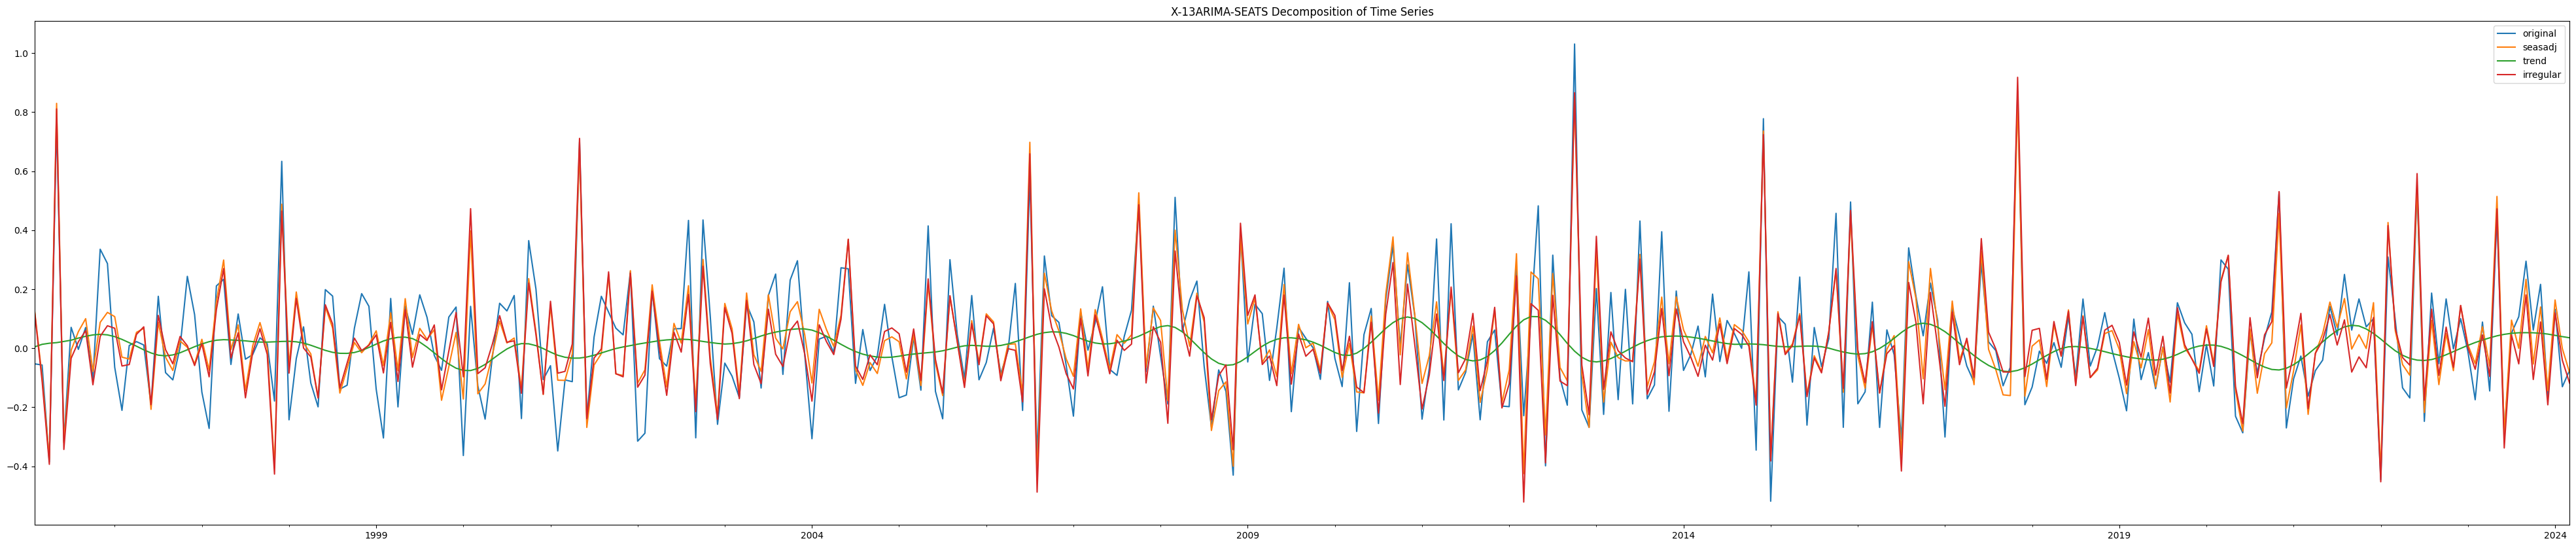

In [110]:
df.plot(figsize=(50, 10), title="X-13ARIMA-SEATS Decomposition of Time Series")

In [100]:
average_mean_abs_error_per_point = df_acurracy["abs_error"].mean()
average_mean_abs_error_per_point

0.1327971763436478

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

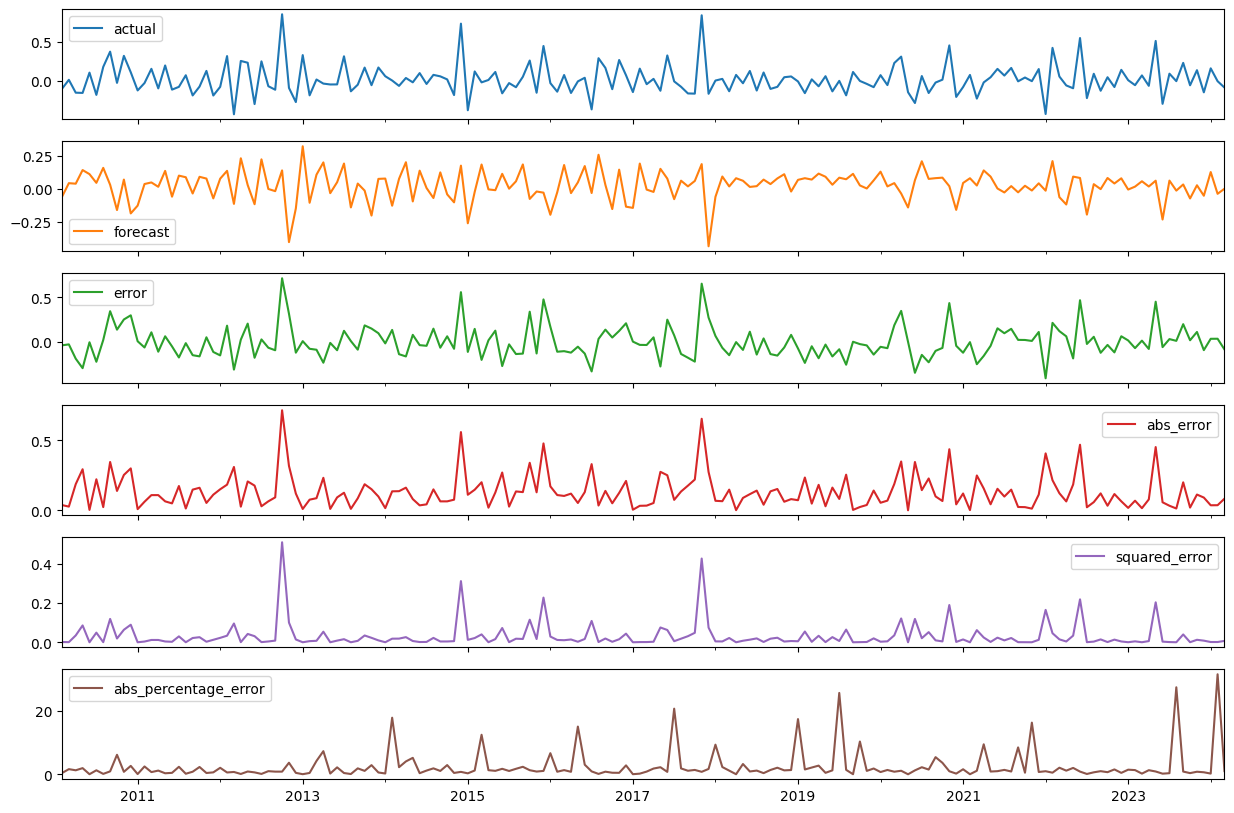

In [82]:
df_acurracy.plot(subplots=True, figsize=(15, 10))

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_breuschpagan

# Load your time series data
# df = pd.read_csv('your_data.csv')
# ts = df['your_time_series_column']

# Stationarity: Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    adf_stat = result[0]
    p_value = result[1]
    is_stationary = p_value < 0.05
    print('ADF Statistic:', adf_stat)
    print('p-value:', p_value)
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    return is_stationary

# Stationarity: KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c')
    kpss_stat = result[0]
    p_value = result[1]
    is_stationary = p_value >= 0.05
    print('KPSS Statistic:', kpss_stat)
    print('p-value:', p_value)
    for key, value in result[3].items():
        print(f'Critical Value {key}: {value}')
    return is_stationary

# Plot ACF and PACF
def plot_acf_pacf(series, lags=24):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # ACF plot
    acf_plot = plot_acf(series, lags=lags, ax=ax[0])
    ax[0].set_xticks(range(lags+1))
    ax[0].set_xticklabels(range(lags+1))
    
    # PACF plot
    pacf_plot = plot_pacf(series, lags=lags, ax=ax[1])
    ax[1].set_xticks(range(lags+1))
    ax[1].set_xticklabels(range(lags+1))
    
    plt.show()

# Decomposition
def decompose(series, model='additive', freq=12):
    decomposition = sm.tsa.seasonal_decompose(series, model=model, period=freq)
    decomposition.plot()
    plt.show()
    return decomposition

# Homoscedasticity Check: Plot Residuals and Breusch-Pagan Test
def plot_residuals(series):
    decomposition = sm.tsa.seasonal_decompose(series, model='additive')
    residual = decomposition.resid.dropna()
    plt.plot(residual)
    plt.title('Residuals')
    plt.show()
    return residual

def breusch_pagan_test(residual, exog):
    test = het_breuschpagan(residual, exog)
    print('Breusch-Pagan Test Statistic:', test[0])
    print('p-value:', test[1])
    return test[1] > 0.05

# Overall Check Function
def check_time_series_assumptions(series, freq=12):
    print("Running ADF Test for Stationarity...")
    adf_result = adf_test(series)
    print(f"is_stationary: {adf_result}")
    
    print("\nRunning KPSS Test for Stationarity...")
    kpss_result = kpss_test(series)
    print(f"is_stationary: {kpss_result}")
    
    
    print("\nDecomposing the Series...")
    decomposition = decompose(series, freq=freq)
    
    print("\nPlotting Residuals for Homoscedasticity Check...")
    residuals = plot_residuals(series)
    
    # Check homoscedasticity
    print("\nRunning Breusch-Pagan Test for Homoscedasticity...")
    exog = sm.add_constant(np.arange(len(residuals)))
    bp_result = breusch_pagan_test(residuals, exog)
    
    # Plot ACF and PACF for residuals
    print("\nPlotting ACF and PACF for Residuals...")
    plot_acf_pacf(residuals)
    
    assumptions_met = adf_result and kpss_result and bp_result
    if assumptions_met:
        print("\nTime series assumptions are met.")
    else:
        print("\nTime series assumptions are not met. Further investigation needed.")
    
    return assumptions_met

# Example Usage
# result = check_time_series_assumptions(ts, freq=12)
# print(f"Assumptions Met: {result}")


Running ADF Test for Stationarity...
ADF Statistic: -10.950690810530403
p-value: 8.813433887023375e-20
Critical Value 1%: -3.4494474563375737
Critical Value 5%: -2.8699542285903887
Critical Value 10%: -2.5712527305187987
is_stationary: True

Running KPSS Test for Stationarity...
KPSS Statistic: 0.03197377155012054
p-value: 0.1
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
is_stationary: True

Decomposing the Series...


C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\1570628558.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


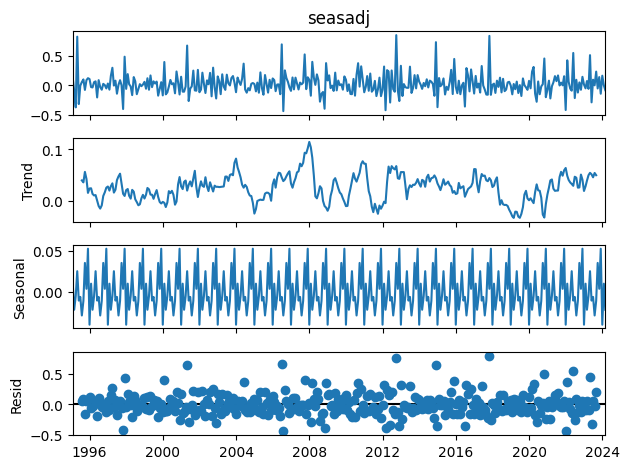


Plotting Residuals for Homoscedasticity Check...


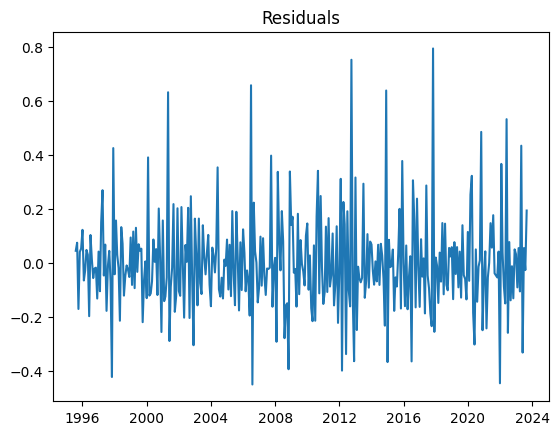


Running Breusch-Pagan Test for Homoscedasticity...
Breusch-Pagan Test Statistic: 2.8753091509003275
p-value: 0.08994770003483864

Plotting ACF and PACF for Residuals...


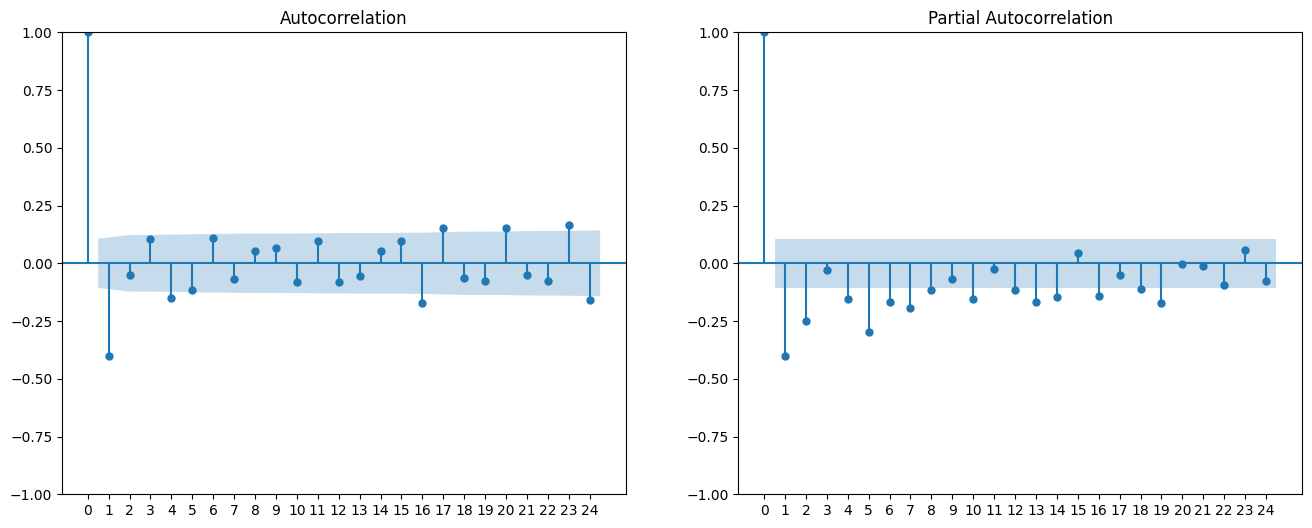


Time series assumptions are met.


True

In [28]:
check_time_series_assumptions(new_ts, freq=12)

In [30]:
from pmdarima import auto_arima

# Use auto_arima to find the best SARIMA parameters
model = auto_arima(new_ts, seasonal=True, m=12, trace=True,
                   error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-240.985, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-169.465, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-227.670, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-242.446, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-165.088, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-242.398, Time=0.08 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-243.544, Time=0.38 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-241.909, Time=0.12 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=-244.437, Time=0.75 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-245.618, Time=0.56 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-174.938, Time=0.28 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=-243.765, Time=1.17 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=-243.772, Time=0.55 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-232.843, Time=0.38 sec
 ARIMA(1,0,2)(2,0,0

C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\1398770145.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return pd.Series(predictions, index=pd.date_range(series.index[-steps], periods=steps, freq='M'))


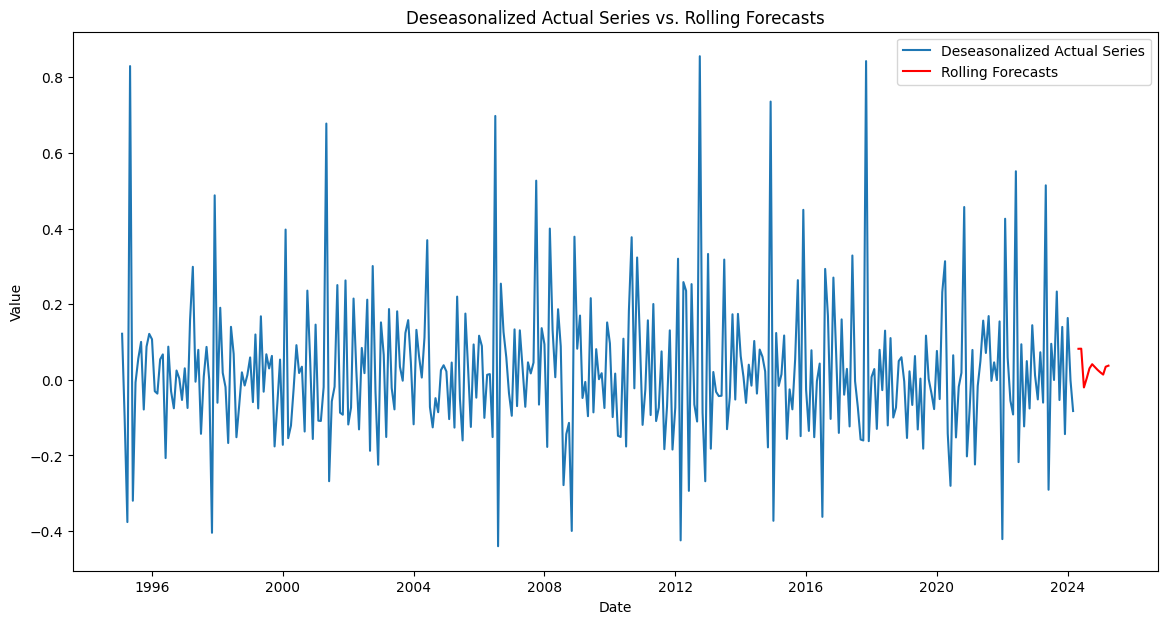

In [35]:
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.x13 import x13_arima_analysis

# Perform X-13ARIMA-SEATS analysis
result = x13_arima_analysis(ts, 
                            x12path='C:\\x13as\\',
                            freq='M')

# Print the seasonally adjusted series
new_ts = result.seasadj
display(new_ts)


# Use auto_arima to find the best SARIMA parameters
model = auto_arima(new_ts, seasonal=True, m=12, trace=True,
                   error_action='ignore', suppress_warnings=True)
# Fit the model
model.fit(new_ts)

# Fit the model
model.fit(new_ts)

# Function to perform rolling forecast
def rolling_forecast(series, model, steps=12):
    predictions = []
    history = list(series)
    
    for t in range(steps):
        model.fit(history)
        forecast = model.predict(n_periods=1)
        predictions.extend(forecast)
        history.append(series.iloc[-1])  # Append the actual value for the next prediction
        series = pd.concat([series, pd.Series(forecast, index=[series.index[-1] + pd.DateOffset(months=1)])])
    
    return pd.Series(predictions, index=pd.date_range(series.index[-steps], periods=steps, freq='M'))

# Predict the next 12 months
rolling_forecasts = rolling_forecast(new_ts, model, steps=12)

# Plotting the deseasonalized series and rolling forecasts
plt.figure(figsize=(14, 7))
plt.plot(new_ts, label='Deseasonalized Actual Series')
plt.plot(rolling_forecasts, label='Rolling Forecasts', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Deseasonalized Actual Series vs. Rolling Forecasts')
plt.legend()
plt.show()


In [32]:
# Fit the model
model.fit(new_ts)

# Forecast the next n periods
n_periods = 12
forecast = model.predict(n_periods=n_periods)

# Create a date range for the forecast
forecast_dates = pd.date_range(new_ts.index[-1], periods=n_periods+1, freq='M')[1:]

# Combine forecast into a Series
forecast_series = pd.Series(forecast, index=forecast_dates)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\914252566.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(new_ts.index[-1], periods=n_periods+1, freq='M')[1:]


In [ ]:
# Extract seasonal component from the result
seasonal_component = result.seasonal

# Combine the forecast with the seasonal component
# For simplicity, let's assume the seasonal component repeats similarly in the future
# This may need to be refined based on actual seasonal factors

# Get the last known seasonal pattern
last_seasonal_pattern = seasonal_component[-12:]

# Repeat the seasonal pattern to match the forecast length
repeated_seasonal_pattern = pd.concat([last_seasonal_pattern] * (n_periods // 12 + 1))[:n_periods]
repeated_seasonal_pattern.index = forecast_series.index

# Rebuild the forecast by adding the seasonal component back
reconstructed_forecast = forecast_series + repeated_seasonal_pattern

# Print the final forecast in original scale
print(reconstructed_forecast)
